In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
df=pd.read_csv('../MachineLearning/datasets/Furniture Price Prediction.csv')

In [41]:
df.head()

,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0


In [42]:
df.shape

(2000, 7)

In [43]:
df.describe(include='object')

,furniture,type,url,sale
count,2000,2000,2000,2000
unique,1224,592,1925,81
top,"Modern capton bed, cm wood",Modern Home,https://www.jumia.com.eg//ar/home-decor-center...,0%
freq,29,678,3,536


In [44]:
df.isna().sum()

furniture     0
type          0
url           0
rate          0
delivery      0
sale          0
price        39
dtype: int64

In [47]:
df.dropna(subset=['price'],inplace=True)

In [48]:
df.isna().sum()

furniture    0
type         0
url          0
rate         0
delivery     0
sale         0
price        0
dtype: int64

<Axes: ylabel='Frequency'>

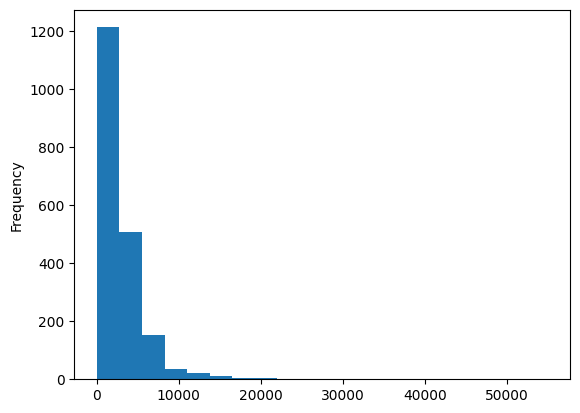

In [49]:
df['price'].plot.hist(bins=20)

In [50]:
df.drop(['furniture','type','url'],axis=1,inplace=True)

In [51]:
df

,rate,delivery,sale,price
0,3.3,172.14,72%,2500.0
1,0.0,172.14,54%,1200.0
2,0.0,172.14,18%,1099.0
3,0.0,172.14,58%,1200.0
4,5.0,52.44,54%,1400.0
...,...,...,...,...
1995,0.0,656.28,0%,1632.0
1996,0.0,172.14,0%,11450.0
1997,0.0,52.44,0%,550.0
1998,0.0,172.14,9%,8495.0


In [59]:
df['sale']=df['sale'].str.rstrip('%').astype('float')

In [60]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [62]:
def model_evaluate(model,name,plot=True):
    y_pred=model.predict(X_test)
    tit = name + "\nMAE:{}\nMSE:{}".format(mean_absolute_error(y_pred, Y_test), mean_squared_error(y_pred, Y_test))
    if plot:
        dd=pd.DataFrame(X_test,columns=['rate','delivery','sale'])
        dd['price']=y_pred
        sns.pairplot(dd,x=['rate','delivery','sale'],y_vars=['price'])
        plt.suptitle(tit)
        plt.tight_layout()
    else:
        print(tit)

In [63]:
def model_train(model, name):
    model.fit(X_train, Y_train)
    model_evaluate(model, name, False)
    return model  

In [64]:
lr=LinearRegression()
rfr=RandomForestRegressor(n_estimators=150,max_depth=10)
svr=SVR(kernel='linear',C=0.6)
abr=AdaBoostRegressor(n_estimators=45,learning_rate=0.01)
knr=KNeighborsRegressor(n_neighbors=10)
models=[lr,rfr,svr,abr,knr]
names = ['Linear Regression', 'Random Forest Regressor', 'Support Vector Regression',
        'Ada Boost Regressor', 'KNeighbors Regressor']

In [65]:
mls=[]
for i,j in zip(models,names):
    mls.append(model_train(i,j))
    print()

Linear Regression
MAE:2003.1022513447022
MSE:10508747.54278597

Random Forest Regressor
MAE:1386.5242969566796
MSE:7654882.283847115

Support Vector Regression
MAE:1813.9128245635345
MSE:10730306.604097852

Ada Boost Regressor
MAE:1711.3576913682523
MSE:8609567.512263061

KNeighbors Regressor
MAE:1464.1498040712468
MSE:7929622.158791967



In [67]:
df = pd.DataFrame(X_test, columns=['rate', 'delivery', 'sale'])
df['price'] = Y_test